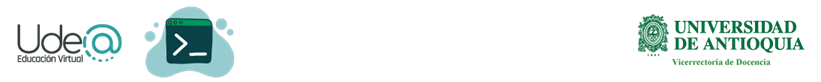

---
# Laboratorio Máquinas de Vectores de Soporte
## Modelos de clasificación

**Laboratorio Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

**Autor: Pablo Alejandro Alvarado Duran**

*   Mateo Muñoz Arroyave
CC 1036676919

*   David Esteban Londoño Patiño
CC 1020465536


---
## Introducción

- Hasta ahora hemos estudiado modelos de aprendizaje de máquina que usan todas las observaciones de una base de datos $\lbrace(\mathbf{x}_n, y_n)\rbrace_{n=1}^{N}$, donde $\mathbf x_n \in \mathbb R^D$, $y_n \in \mathbb R$.

- Utilizar todos los datos durante el entrenamiento y/o predicción puede volverse inviable o muy costoso computacionalmente, debido al excesivo tiempo necesario para hacer operaciones.

- Las *máquinas de vectores de soporte* (SVM en inglés) son modelos que utilizan solo un subconjunto de datos de entrenamiento para hacer predicciones, por lo tanto, son mas eficientes computacionalmente.



---
## Formulación del modelo

### Clasificación binaria usando SVM

En este caso la salida $y_n$ puede tomar un conjunto finito de valores, es decir, es una variable discreta. Específicamente $y_n \in \lbrace -1, +1 \rbrace$. El modelo SVM corresponde a

$$
f(\mathbf x) =  \mathbf w^\top \boldsymbol \phi (\mathbf x)  + b,
$$

donde podemos reescribir el producto interno como

$$
f(\mathbf x) = \langle \mathbf w, \boldsymbol \phi (\mathbf x) \rangle + b.  
$$

Un dato nuevo de test $\hat {\mathbf x}$ será clasificado según el signo que tome $f(\hat{\mathbf x})$.

Por el momento asumiremos que los datos son separables de forma lineal, de manera que $f(\mathbf x_n) > 0 $ para datos que tengan su correspondiente etiqueta $y_n = 1$, y $f(\mathbf x_n) < 0 $ para datos que tengan su correspondiente etiqueta $y_n = -1$. Esto implica que

$$y_n \cdot f(\mathbf x_n) > 0, \ \forall \ n$$.  




---
## Inferencia

En SVM el concepto de *margen* se refiere a la distancia mas pequeña entre un dato de entrenamiento y la frontera de decisión.

Pueden haber múltiples soluciones a este problema de clasificación (fronteras de decisión). La solución óptima corresponde a la frontera que maximice el *margen*.

<img src="https://drive.google.com/uc?id=1w7n1vU5slE8odrdkmykNzYykGjKkvj48" alt="Employee data" width="400"  title="Employee Data title">
<img src="https://drive.google.com/uc?id=1CQtSSDdEue3jURePylctNlUNQXYI4GHn" alt="Employee data" width="400"  title="Employee Data title">



### Función objetivo

$$
L(\mathbf a) =
\sum_{n=1}^{N} a_n -
\frac{1}{2}\sum_{n=1}^{N}
\sum_{m=1}^{N}
a_n a_m
y_n y_m
\boldsymbol{\phi}(\mathbf{x_n})^{\top}
\boldsymbol{\phi}(\mathbf{x_m}),
$$

donde el producto interno $\boldsymbol{\phi}(\mathbf{x_n})^{\top}
\boldsymbol{\phi}(\mathbf{x_m})$ podría reemplazarse por un kernel, de manera que:

$$
\langle \mathbf{x_n}, \mathbf{x_m} \rangle = \boldsymbol{\phi}(\mathbf{x_n})^{\top}
\boldsymbol{\phi}(\mathbf{x_m})
$$

$$
k(\mathbf{x_n},\mathbf{x_m}) = \langle \boldsymbol \phi (\mathbf{x_n}), \boldsymbol \phi (\mathbf{x_m}) \rangle
$$

obteniendo así

$$
L(\mathbf a) =
\sum_{n=1}^{N} a_n -
\frac{1}{2}\sum_{n=1}^{N}
\sum_{m=1}^{N}
a_n a_m
y_n y_m
k(\mathbf{x_n}, \mathbf{x_m}).
$$

Este problema de optimización cumple con las siguiente restricciones

$$a_n \geq 0,$$

$$y_n \cdot f(\mathbf{x}_n) - 1 \geq 0,$$

$$a_n \lbrace y_n \cdot f(\mathbf{x}_n) - 1 \rbrace = 0.$$

Por lo tanto, para cada dato $\mathbf x_n$ se cumple que $a_n = 0$, o que $y_n f(\mathbf{x}_n) =1$.

---
## Predicción

$$
f(\mathbf x) =
\sum_{n=1}^{N}
a_n
y_n
k(\mathbf{x}, \mathbf{x_n}).
$$


Cualquier dato $\mathbf{x}_n$ que tenga su correspondiente $a_n$ igual a cero no afectará la predicción/clasificación para un nuevo dato $\mathbf{x}$. Los datos que si se utilizan se conocen como *vectores de soporte*.

Una vez el modelo de SVM es entrenado, una cantidad significativa de datos es descartada, y solo se retienen los vectores de soporte. De ahí la eficiencia computacional de este modelo.

<p align="center">
<img src="https://drive.google.com/uc?id=15kbA8XePrA_Xz-pxmcLmXiuBpgLZb8eh" alt="Employee data" width="500"  title="Employee Data title">
</p>

---
# **Trabajo de laboratorio**

## Datos sintéticos
En este trabajo de laboratorio vamos a utilizar el módulo `sklearn.svm` para implementar diferentes modelos de clasificación binaria basados en máquinas de vectores de soporte. Exploraremos tres kernels diferentes:

- lineal: $$k(\mathbf{x}_n, \mathbf{x}_m) = \langle \mathbf{x}_n, \mathbf{x}_m \rangle,$$
- polinomial: $$k(\mathbf{x}_n, \mathbf{x}_m) = (\gamma \langle \mathbf{x}_n, \mathbf{x}_m \rangle + r)^D,$$
- RBF: $$k(\mathbf{x}_n, \mathbf{x}_m) = \exp (-\gamma ||\mathbf{x}_n - \mathbf{x}_m ||^2).$$


Con este propósito, vamos a entrenar los modelos SVM sobre **tres** bases de datos sintéticas distintas, muestreadas a través del módulo `sklean.datasets`:

- `make_moons`
- `make_circles`
- `make_classification`.

Para cada caso generar 100 datos de manera que $\mathbf x_n \in \mathbb R^2$, $y_n \in \lbrace 0, 1 \rbrace$. Graficar los datos clasificados, así como la frontera de decisión del clasificador entrenado (curvas de nivel).

1. Cómo afecta el kernel utilizado a la forma de la frontera aprendida por el modelo SVM?
2. Para cada modelo establezca cuáles son los vectores de soporte, es decir el subconjunto de datos utilizados por el modelo para hacer predicciones. Qué puede concluir al comparar los resultados obtenidos con cada kernel?

## Datos reales

Investigue (en `sklearn`) cómo extender las máquinas de soporte vectorial para que puedan ser utilizados en clasificación multi-clase, y aplique un modelo SVM con kernel RBF a una base de datos real, donde el vector de entrada sea de dimensión 2, es decir $\mathbf x_n \in \mathbb R^2$. Entrene diferentes modelos, de manera que cada modelo utilice un valor diferente para el parámetro $\gamma$ del kernel RBF.

1. Cuál es la relación entre los valores de los parámetros del kernel y la forma de la frontera (y curvas de nivel) del modelo entrenado? Argumente su respuesta.


---
## Bibliografía
- Imágenes tomadas de: Pattern Recognition and Machine Learning, Christopher M. Bishop. https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf (libro original gratis).

- Mathematics for Machine Learning, Marc Peter Deisenroth. https://mml-book.github.io/ (libro original gratis).

- Machine Learning: A Probabilistic Perspective, Kevin P. Murphy.

- Módulo Support Vector Machines de `sklearn`. https://scikit-learn.org/stable/modules/svm.html

- Ejemplo comparador de clasificadores usando `sklearn` https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn import svm
import pandas as pd
from itertools import product
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

seed = np.random.seed(100) # blink

In [ ]:
# Generar bases de datos sintéticas
x_moons, y_moons = make_moons(noise=0.1 ,random_state=seed)

x_circles, y_circles = make_circles(noise=0.1 ,random_state=seed, factor=0.5)

x_class, y_class = make_classification(n_features=2,
                                       n_redundant=0,
                                       n_informative=2,
                                       n_clusters_per_class=1,
                                       random_state=seed)

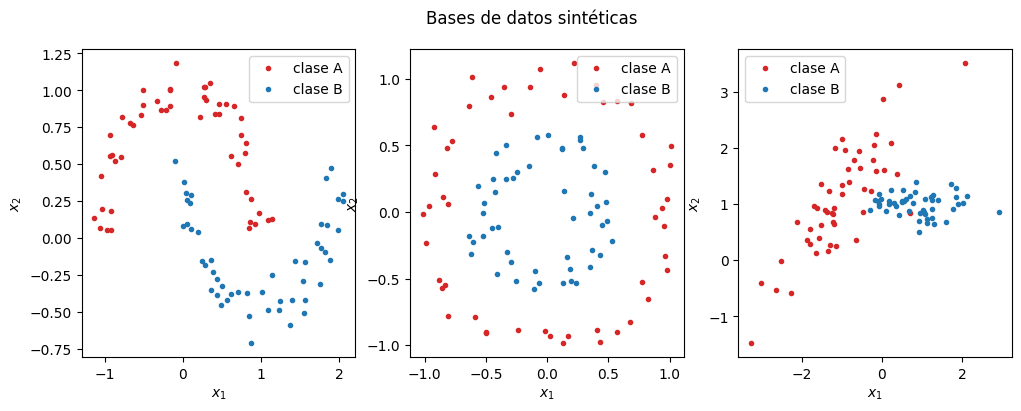

In [ ]:
# vizualizar bases de datos
def plot_data(x, y):
  plt.plot(x[y==0,0], x[y==0,1], 'C3.', label='clase A')
  plt.plot(x[y==1,0], x[y==1,1], 'C0.', label='clase B')
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.legend()

plt.figure(figsize=(12,4))
plt.suptitle("Bases de datos sintéticas")

plt.subplot(1,3,1)
plot_data(x_moons, y_moons)

plt.subplot(1,3,2)
plot_data(x_circles, y_circles)

plt.subplot(1,3,3)
plot_data(x_class, y_class)

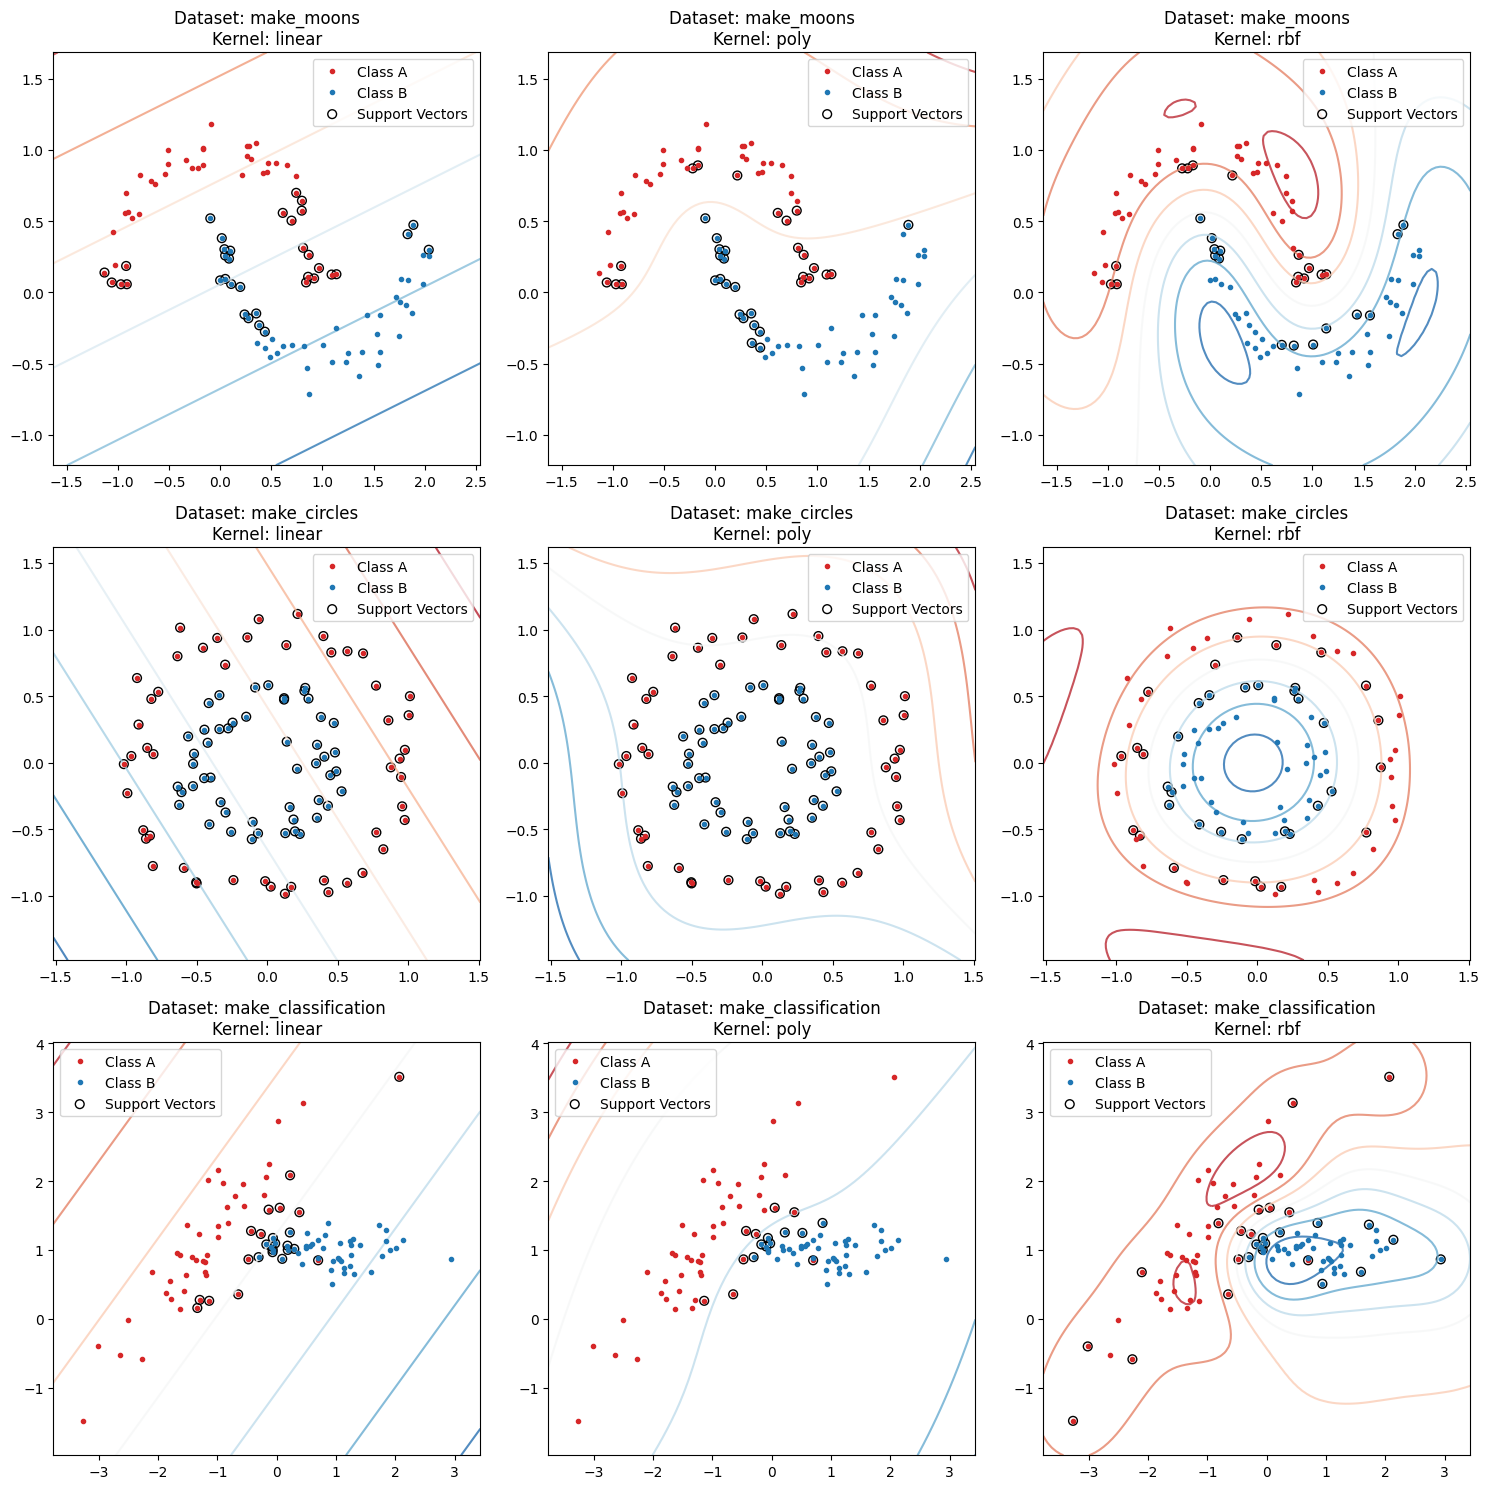

In [ ]:
all_x = [x_moons, x_circles, x_class]
all_y = [y_moons, y_circles, y_class]
kernels = ['linear', 'poly', 'rbf']
datasets = ['make_moons', 'make_circles', 'make_classification']
support_vectors = []

figure, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    x_temporary = all_x[i]
    y_temporary = all_y[i]
    dataset = datasets[i]

    for j in range(3):
        kernel_type = kernels[j]
        classifier = svm.SVC(kernel=kernel_type, gamma=1, C=1)

        classifier.fit(x_temporary, y_temporary)

        sv = classifier.support_vectors_

        # Predicciones
        y_pred = classifier.predict(x_temporary)
        support_vectors.append(len(sv))

        # Visualizar resultados
        axis = axs[i, j]
        DecisionBoundaryDisplay.from_estimator(classifier, x_temporary, alpha=0.8, eps=0.5, plot_method='contour', cmap=plt.cm.RdBu, ax=axis)
        axis.plot(x_temporary[y_temporary==0,0], x_temporary[y_temporary==0,1], 'C3.', label='Class A')
        axis.plot(x_temporary[y_temporary==1,0], x_temporary[y_temporary==1,1], 'C0.', label='Class B')
        axis.scatter(sv[:, 0], sv[:, 1], s=40, facecolors='none', edgecolors='k', label='Support Vectors')
        axis.set_title('Dataset: {}\nKernel: {}'.format(dataset, kernel_type))
        axis.legend()

plt.tight_layout()
plt.show()

### Respuesta 1.1
El tipo de kernel desempeña un papel crucial en la determinación de las fronteras de decisión en un modelo de máquinas de soporte vectorial (SVM). La elección del kernel afecta directamente la manera en que los datos de entrada se transforman hacia un espacio de características de mayor dimensión, definiendo así las fronteras de decisión.

- Kernel Lineal: Este kernel, siendo la forma más básica, busca dividir los datos con una línea recta, es decir, la frontera de decisión es una línea recta. Su función radica en mapear los datos a un espacio de mayor dimensión, donde las fronteras de decisión adoptan la forma de hiperplanos lineales.

- Kernel RBF (Función de Base Radial): La característica distintiva de este kernel es que mapea los datos a un espacio de características con dimensionalidad infinita mediante funciones de base radial. Las fronteras de decisión generadas con el kernel RBF son no lineales, lo que permite abordar problemas que no son linealmente separables en el espacio de características original, como se visualiza en las gráficas.

- Kernel Polinomial: En este caso, el kernel polinomial transforma los datos a un espacio de características de mayor dimensión utilizando funciones polinomiales. Su objetivo principal es modelar la frontera de decisión de manera que se asemeje a una curva polinómica.







In [ ]:
data = {
    'Dataset': [],
    'Kernel': [],
    'Número de Vectores de Soporte': support_vectors
}

for dataset, kernel in product(datasets, kernels):
    data['Dataset'].append(dataset)
    data['Kernel'].append(kernel)

df = pd.DataFrame(data)
df

,Dataset,Kernel,Número de Vectores de Soporte
0,make_moons,linear,36
1,make_moons,poly,36
2,make_moons,rbf,28
3,make_circles,linear,100
4,make_circles,poly,100
5,make_circles,rbf,38
6,make_classification,linear,25
7,make_classification,poly,16
8,make_classification,rbf,28


###Respuesta 1.2
Al comparar los resultados obtenidos con cada kernel, se puede observar que el kernel RBF tiende a tener menos puntos en el vector de soporte en todas las bases de datos. Este fenómeno puede atribuirse a la capacidad del kernel RBF para ajustarse rápidamente a las fronteras de las bases de datos, lo que implica que requiere menos puntos para construir fronteras de calidad.

Ahora, en cada kernel presenta sus propios conjuntos de vectores de soporte, que son puntos de datos especialmente relevantes para definir las fronteras de decisión. Estos vectores de soporte reflejan la importancia de ciertos puntos de datos en la separación de clases y la determinación de las fronteras de decisión. Es crucial tener en cuenta que la ubicación y la cantidad de vectores de soporte pueden variar significativamente según el tipo de kernel utilizado.

##Datos reales

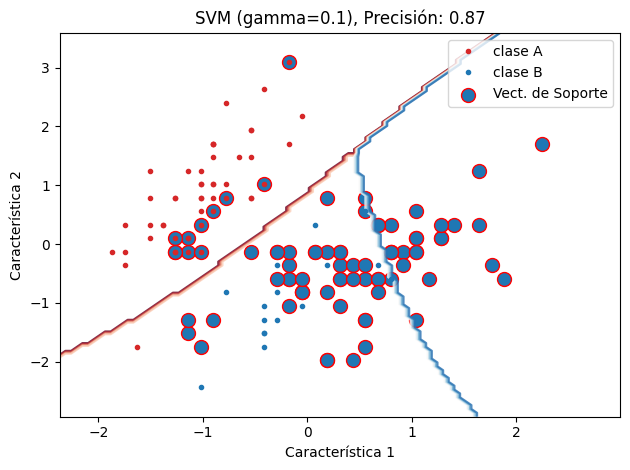

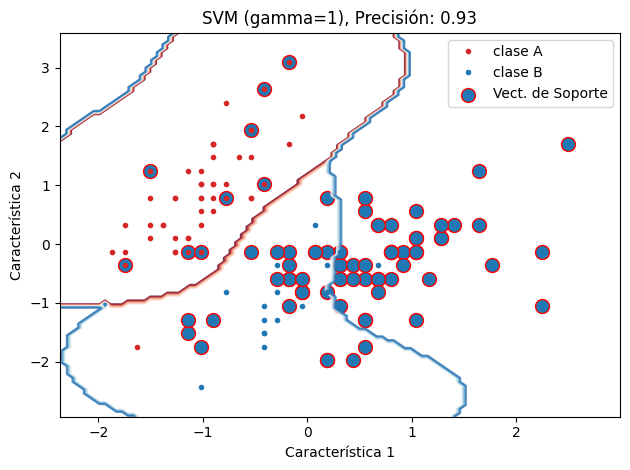

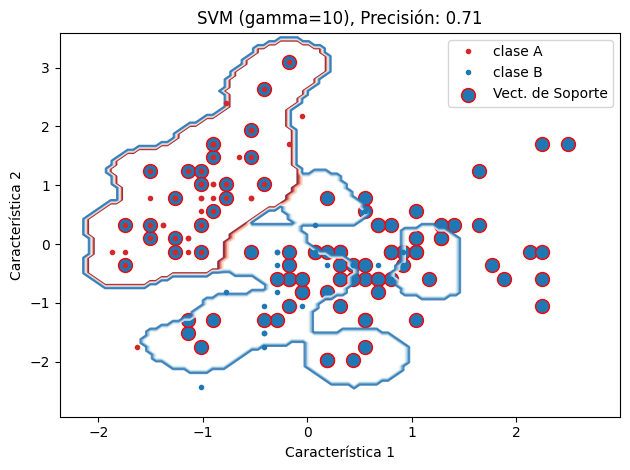

In [ ]:
# Cargar la base de datos Wine para un análisis SVM
data = datasets.load_iris()
X = data.data[:, :2]  # Tomar solo las primeras 2 dimensiones de la base de datos
y = data.target

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Diferentes valores para el parámetro gamma en el kernel RBF
gamma_values = [0.1, 1, 10]

# Entrenar y evaluar modelos SVM con diferentes valores de gamma
for gamma in gamma_values:
    # Crear el clasificador SVM con kernel RBF
    classifier = svm.SVC(kernel='rbf', gamma=gamma, decision_function_shape='ovr')
    classifier.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = classifier.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)

    # Obtener vectores de soporte
    support_vectors = classifier.support_vectors_

    # Visualizar la frontera de decisión y los datos
    DecisionBoundaryDisplay.from_estimator(classifier, X, alpha=0.8, eps=0.5, plot_method='contour', cmap=plt.cm.RdBu, ax=plt.gca())
    plot_data(X, y)

    # Resaltar los vectores de soporte en rojo
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, edgecolors='r', marker='o', label='Vect. de Soporte')

    # Configuración del gráfico
    plt.title(f"SVM (gamma={gamma}), Precisión: {accuracy:.2f}")
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.show()


La relación entre los valores de los parámetros del kernel, especialmente el parámetro γ, y la configuración de la frontera y las curvas de nivel en los modelos SVM con kernel RBF es crucial. γ actúa como un regulador que controla la flexibilidad de la frontera de decisión: valores bajos generan fronteras suaves y generalizadas, mientras que valores altos producen fronteras más ajustadas y complejas. La selección óptima de γ implica pruebas con distintos valores para lograr el mejor rendimiento del modelo en términos de precisión y capacidad de generalización, siendo una decisión dependiente del conjunto de datos.

Estas representaciones visuales ayudan a identificar la región óptima para γ, permitiendo una mejor comprensión de su impacto en el rendimiento del modelo. Posteriormente, se crean nuevos modelos SVM con los valores óptimos de γ y se entrenan con el conjunto de datos combinado. Se calcula la precisión de estos modelos y se imprime. Además, se visualizan las fronteras de decisión de ambos modelos, proporcionando una representación gráfica de cómo clasifican el espacio de características. Este análisis global permite evaluar la capacidad de generalización y adaptación de cada modelo ante distintos valores de γ, ofreciendo una visión completa del rendimiento del modelo con kernel RBF en un contexto de clasificación multi-clase.